# Naive Recurrent neural network Created by 周亭
- ** Creat one RNN Step by step from scratch **
    - Forward propgation
    - Backward propgation
    - Prediction

In [4]:
import numpy as np
from TestCase import *

## 1.1.  Forward propgation Function
- Input: input data (X), previous activation (a_prev), parameters (caches_prev)
- Output: next activation (a_next), yPred (prediction), caches(input data(X)、a_prev、a_next、W， for backprop)


- ** What should I do? **

    -  One step: You should acturally understand every parameters, espesially the shapes.
    
    -  Two step: You should acturally understand the formulations would be used.
- ** Creat some Functions.**
    -  one_step_forward_prop(arguments)
    -  one_layer_forward_prop(arguments)
 
        

In [5]:
def one_step_forward_prop(x_t, a_prev_t, parameters):
    """
    Implement one step forward propagation.
    Arguments:
    x_t -- input data at timestep "t". x_t.shape = (n_x, m)
    a_prev_t -- Hidden unit's activation at timetep "t". a_prev_t(n_a, m)
    parameters -- python dictionary containing:
                Waa: weight matrix mearsure relationship between a_prev and unit. |Waa.shape=(n_a, n_a)
                Wax: weight matrix mearsure relationship between Input and unit. |Wax.shape=(n_a, n_x)
                Wya: weight matrix mearsure relationship between yPred and unit. |Wya.shape=(n_y, n_a)
                ba: bias, mearsure bias between (Waa*a_prev + Wax*Input) and a_next. |ba.shape=(n_a, 1)
                by: bias, mearsure bias between (Wya*a_next) and yPred.  |by.shape=(n_y, 1)
    Returns:
    a_next_t: Hidden unit activation, for this unit is output, for next unit is input.|a_next_t.shape=(n_a, m)
    yPred_t: Estimation output of this unit. |yPred_t.shape=(n_y, m)
    cache: All extern inputs and outputs of this unit, think this unit is a black box
    """
    Waa = parameters["Waa"]
    Wax = parameters["Wax"]
    Wya = parameters["Wya"]
    ba = parameters["ba"]
    by = parameters["by"] 
    # compute a_next
    a_next_t = np.tanh(np.dot(Waa, a_prev_t) + np.dot(Wax, x_t) + ba)
    # compute yPred
    yPred_t = np.dot(Wya, a_next_t) + by
    # save to cache, backpropagation would be used later.
    cache = (a_next_t, a_prev_t, x_t, parameters)
    
    return a_next_t, yPred_t, cache

In [6]:
# Test function one_step_forward_prop
np.random.seed(1)
x_test = np.random.randn(2,10)
a_prev_test = np.random.randn(5,10)
parameters_test = {"Wax":np.random.randn(5,2),
              "Waa":np.random.randn(5,5),
              "Wya":np.random.randn(2,5),
              "ba":np.random.randn(5,1),
              "by":np.random.randn(2,1)
             }
a_next_test, yPred_test, cache_test = one_step_forward_prop(x_test, a_prev_test, parameters_test)
print("Test case 1 result:")
print("next activation = \n", a_next_test[2])
print("a_next_test.shape = ", a_next_test.shape)
print("y prediction = \n", yPred_test[0])
print("yPred_test.shape = ", yPred_test.shape)
#print("caches now = \n", cache_test)
print("Length of cache = ", len(cache_test))

Test case 1 result:
next activation = 
 [-0.99998633  0.99984875  0.7820359  -0.85382663 -0.98226818 -0.80326164
 -0.83330961 -0.95611917 -0.72410346 -0.99813445]
a_next_test.shape =  (5, 10)
y prediction = 
 [ 1.11183921 -1.48211989 -0.9604518   0.86287306  1.19057767  0.0959034
  1.08596853  1.49109483  0.9387836   0.19563566]
yPred_test.shape =  (2, 10)
Length of cache =  4


——————————————————————————————————————————————————————————————————————

- ** Tips **

    比如：
    1. 输入一句话，"Karl marks onece said foreign language is a weapon in the struggle of life"是字符串.
    2. 自然语言处理的必经之路是把字符串编码为词向量（word vector），比如marks：Vmarks =[0,0,0,...,0,0,0,0,1,0,0,0,0,0.....]. 
    3. 自然语言处理假定存在一个词表，包含人类所有出现过的词汇，vocabulary = [a, arron,...,b,...,k,..karl,..,m,..marks,..]
    
——————————————————————————————————————————————————————————————————————

In [7]:
def one_layer_forward_prop(x, a_prev, parameters):
    """
    Implement one layer forward propagation.
    Arguments:
    x -- Input data, contain Tx(Ex,Tx = 10) xt. Input.shape = (n_x, m, Tx) 
    a_prev -- one time setp activation from previous Hidden unit, a_prev(n_a, m)
    parameters -- python dictionary containing:
    Returns:
    a_next: All Hidden unit's activations in this layer, for this layer is output,|a_next_t.shape=(n_a, m, Tx)
    yPred_t: Estimation output of this unit. |yPred_t.shape=(n_y, m, Tx)
    cache: All extern inputs and outputs of this unit, think this unit is a black box
    """

    n_x, m, Tx = x.shape
    n_y, n_a = parameters["Wya"].shape
    a = np.zeros((n_a, m, Tx))
    #initialing output
    a_next = a_prev
    yPred = np.zeros((n_y, m, Tx))
    caches = []
    
    for t in range(Tx):
        a_next, yPred[:,:,t], cache = one_step_forward_prop(x[:,:,t], a_next, parameters)
        a[:,:,t] = a_next
        caches.append(cache)
    
    caches = (caches, x)
   
    return a, yPred, caches

In [19]:
# Test function one_layer_forward_prop
np.random.seed(1)
x_test = np.random.randn(2,10,7)
a_prev_test = np.random.randn(5,10,7)[:,:,4]
parameters_test = {"Wax":np.random.randn(5,2),
              "Waa":np.random.randn(5,5),
              "Wya":np.random.randn(2,5),
              "ba":np.random.randn(5,1),
              "by":np.random.randn(2,1)
             }
a_next_test, yPred_test, cache_test = one_layer_forward_prop(x_test, a_prev_test, parameters_test)
print("Test case 1 result:")
print("next activation = \n", a_next_test[2][3])
print("a_next_test.shape = ", a_next_test.shape)
print("y prediction = \n", yPred_test[0][1])
print("yPred_test.shape = ", yPred_test.shape)
#print("caches now = \n", cache_test)
print("Length of cache = ", len(cache_test))

Test case 1 result:
next activation = 
 [-0.99471268 -0.99776608  0.18307812 -0.9668238   0.98015875  0.48109797
  0.84103835]
a_next_test.shape =  (5, 10, 7)
y prediction = 
 [ 1.31147634 -1.64296823 -0.54258199 -3.08434496 -0.9025737  -2.38753958
 -0.61779837]
yPred_test.shape =  (2, 10, 7)
Length of cache =  2


——————————————————————————————————————————————————————————————————————

- ** Tips **
    又比如：
    1. vocabulary = [a, arron,...,b,...,k,..karl,..,m,..marks,..], 假定len(vocabulary) = 520 (520个词)
    2. karl在vocabulary中的索引是第250，就先创建一个520列的一维向量Vkarl，再把Vkarl中第1314250标记为1，者就是one-hot vector
    3. karl最牛逼是No.1. 则Vkarl = [0,0,0,0,...,1,0,0,...]
   
——————————————————————————————————————————————————————————————————————

    

##  1.2. Backward propgation Function

- **  Why to implement backward propagation? **

    -  From the above two functions, one_step_forward_prop()、one_layer_forward_prop(), We used Argument parameters.
    -  If we build a neural network model from scratch, this parameters are unknow values.
    -  But, We know all shapes of parameters, so we will do something, e.g, np.zeros(()), to inialize parameters.
    -  Then, we created forward propagation algorithm to compute all activations and predictions.
    -  With training, we should update this parameters, they called this gradient descent algorithm.
    
    
- **  Why to compute partical derivatives? **

    -  Because you want to implement backward propagation.
    
    
- **  How to compute partical derivatives?  **

    -  Have: J(x,y,z) = 2x+3y+4z+xyz. Then: ∂J(x,y,z)/∂x = 2+yz, ∂J(x,y,z)/∂y = 3+xz, ∂J(x,y,z)/∂z = 4+xy
    
    
- **  How to implement backward propagation? **

    -  From the above two functions, one_step_forward_prop()、one_layer_forward_prop(), We used parameters，[Waa、Wax、Wya、ba、by].
    -  From algorithm , we can get loss function based on our algorithm.
    -  a_next_t = np.tanh(np.dot(Waa, a_prev_t) + np.dot(Wax, x_t) + ba), a_next_t is loss function.
    
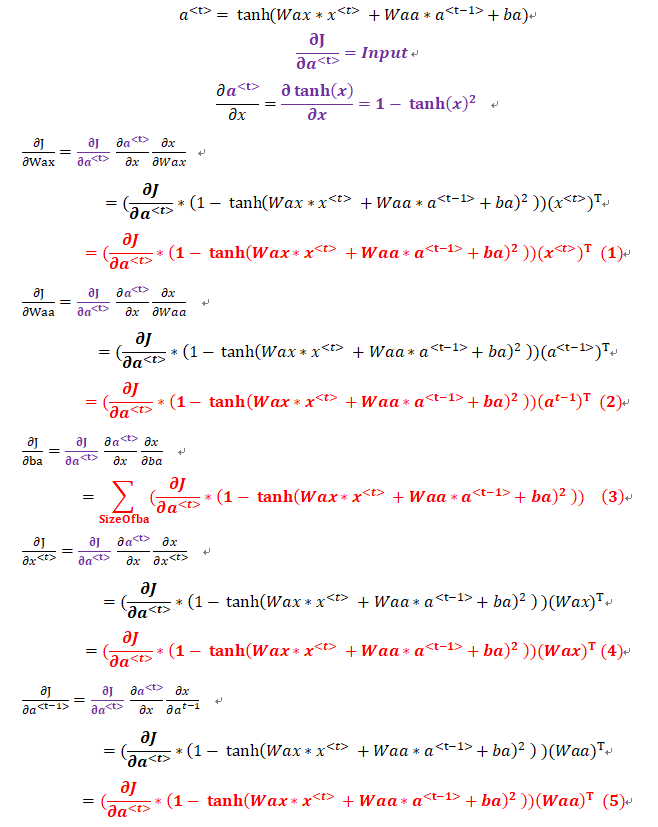

- ** So , may it be, it,s time to implement **            

In [15]:
def one_step_backward_prop(da_t, cache):
    """
    Implement one step backward propagation.
    Arguments:
    da_t -- Input data, output activation for this unit, input for next unit. Input.shape = (n_a, m) 
    cache-- All extern inputs and outputs parameters when forward prop to computer a_t, 
            think this unit is a black box. A tuple type in python.   
    Returns:
    gradients -- dWax、dWaa、dba、dx_t、da_prev_t
    """    
    
    # retrive caches
    (a_next_t, a_prev_t, x_t, parameters) = cache
    
    # retrive parameters
    Waa = parameters["Waa"]
    Wax = parameters["Wax"]
    Wya = parameters["Wya"]
    ba = parameters["ba"]
    by = parameters["by"]
    
    # computer dtanh(x)/dx:
    dtanh = (1 - np.tanh(np.power(np.dot(Wax, x_t) + np.dot(Waa, a_prev_t) + ba, 2)))*da_t
    
    # computer dJ/dWax,dWaa,dba, dx_t,da_prev_t
    dWax = (np.dot(dtanh, x_t.T))
    dWaa = np.dot(dtanh,a_prev_t.T)
    dba = np.sum(dtanh, axis=-1,keepdims=True)
    dx_t = np.dot(Wax.T, dtanh)
    da_prev_t = np.dot(Waa.T, dtanh)
    
    # create gradients:
    gradients = {"dWax":dWax, "dWaa":dWaa, "dba":dba, "dx_t":dx_t, "da_prev_t":da_prev_t}
    
    return gradients

In [16]:
# Test function one_step_backward_prop
np.random.seed(1)
x_test = np.random.randn(2,10)
a_prev_test = np.random.randn(5,10)
parameters_test = {"Wax":np.random.randn(5,2),
              "Waa":np.random.randn(5,5),
              "Wya":np.random.randn(2,5),
              "ba":np.random.randn(5,1),
              "by":np.random.randn(2,1)
             }
a_next_test, ypred_test, caches_test = one_step_forward_prop(x_test, a_prev_test,parameters_test)
#print(caches_test[1].shape)
#print(a_next_test.shape)
da_next_test = np.random.randn(5,10)
gradients_test = one_step_backward_prop(da_next_test, caches_test)
print("gradients_test[\"dWax\"] = \n", gradients_test["dWax"])
print("gradients_test[\"dWaa\"] = \n", gradients_test["dWaa"])
print("gradients_test[\"dba\"] = \n", gradients_test["dba"])

gradients_test["dWax"] = 
 [[-1.63882455 -3.67525384]
 [-0.59077461 -1.38299596]
 [-0.28048683 -0.15479639]
 [ 0.31540454 -1.72794563]
 [ 2.01547455  2.43348627]]
gradients_test["dWaa"] = 
 [[ 1.83898169 -1.02858635  0.27154538 -0.30224451  1.69588151]
 [ 1.22475745  0.04024518 -1.764942   -0.88372134  1.31725408]
 [ 0.05509375 -0.27161986 -0.12779239 -0.07220488 -0.14021758]
 [ 0.52951356 -1.15234949 -1.71476827 -1.38823502  1.95370378]
 [ 2.47292086 -1.89138218 -4.27229683 -1.82329296 -3.36470765]]
gradients_test["dba"] = 
 [[ 1.96642034]
 [ 0.2037437 ]
 [ 0.14163372]
 [-0.47469714]
 [-1.36186173]]


——————————————————————————————————————————————————————————————————————
- ** Tips **
    所以，
    1. 矩阵点乘和叉乘，两者需要搞清楚；
    2. 搞清楚的最好办法之一可能要注意各变量的shape；
    3. 不然，很郁闷了。
    
——————————————————————————————————————————————————————————————————————

In [48]:
def one_layer_backward_prop(da, caches):
    """
    Implement one layer backward propagation.
    Arguments:
    da -- Input data, output activation for all units in this layer, input for next layer. Input.shape = (n_a, m, Tx) 
    caches-- All extern inputs and outputs parameters when forward prop to computer a_t, 
            think this unit is a black box. A tuple type in python.   
    Returns:
    gradients -- dWax、dWaa、dba、dx、da_prev
    """ 
    # retrive this caches
    (caches, X) = caches
    (a_next_t, a_prev_t, x_t, parameters) = caches[1]
    n_a, m, Tx = da.shape
    n_x, m  = x_t.shape
    
    # inialize dWax、dWaa、dba、dx、da_prev
    dWax = np.zeros((n_a, n_x))
    dWaa = np.zeros((n_a, n_a))
    dba =  np.zeros((n_a, 1))
    dx = np.zeros((n_x, m, Tx))
    da0 = np.zeros((n_a, m))
    da_prev_t = np.zeros((n_a, m))
    
    # for loop compute dWax、dWaa、dba、dx、da_prev:
    for t in range(Tx):
        t_gradients = one_step_backward_prop(da[:,:,t]+da_prev_t, caches[t])
        da_prev_t = t_gradients["da_prev_t"]
        dWax += t_gradients["dWax"]
        dWaa += t_gradients["dWaa"]
        dba += t_gradients["dba"]
        dx[:,:,t] = t_gradients["dx_t"]
        
    da0 = t_gradients["da_prev_t"]
    
    # create gradients:
    gradients = {"dWax":dWax, "dWaa":dWaa, "dba":dba, "dx":dx, "da0":da0}
    return gradients
    

In [51]:
# Test function one_layer_backward_prop
np.random.seed(1)
x_test = np.random.randn(2,10,3)
a_prev_test = np.random.randn(5,10)
parameters_test = {"Wax":np.random.randn(5,2),
              "Waa":np.random.randn(5,5),
              "Wya":np.random.randn(2,5),
              "ba":np.random.randn(5,1),
              "by":np.random.randn(2,1)
             }
a_next_test, yPred_test, cache_test = one_layer_forward_prop(x_test, a_prev_test, parameters_test)
da_test = np.random.randn(5,10,3)
gradients = one_layer_backward_prop(da_test, cache_test)
print("Test case 1 result:")
print("next activation = \n", a_next_test[2][3])
print("a_next_test.shape = ", a_next_test.shape)
print("y prediction = \n", yPred_test[0][1])
print("yPred_test.shape = ", yPred_test.shape)
#print("caches now = \n", cache_test)
print("Length of cache = ", len(cache_test))

Test case 1 result:
next activation = 
 [-0.96680524  0.36621471 -0.59906323]
a_next_test.shape =  (5, 10, 3)
y prediction = 
 [-0.45014958 -0.32370911 -0.72330034]
yPred_test.shape =  (2, 10, 3)
Length of cache =  2


## - Conclusion
    -  1. 输入数据需要处理成一系列计算机可以认识的0，1数据，比如，一句话，对于NLP进入neural unit的对象是一个词；
    -  2. RNN，即所谓递归神经网络，是通过一系列递归计算（公式），实现输入数据分析，计算过程和计算输出是人为设计的结果；
    -  3. 后续GRU、LSTM等模型算法，相当于对基本流程的优化和改造；
    下面画出RNN forward/backward propagation流程图；
    
- ** one_step_forward_prop | one_step_backward_prop **:
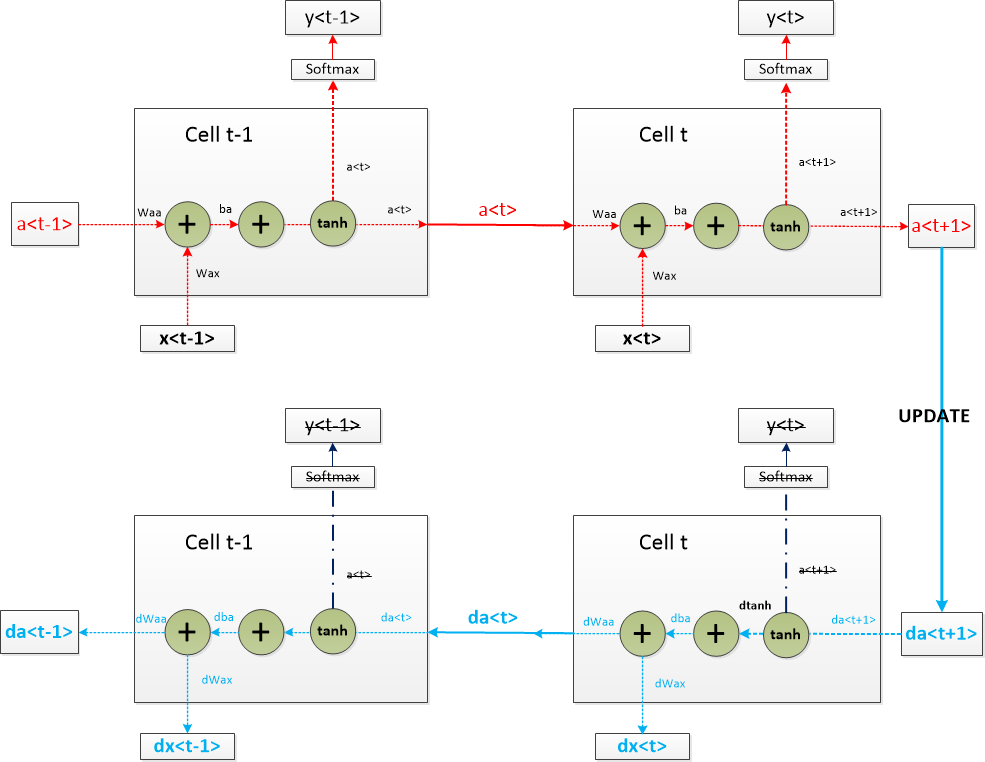
